<a href="https://colab.research.google.com/github/raulbenitez/postgrau_IML_exploratory/blob/master/EXPLORATORY/regresion_univariada_modelos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Modelos univariados de regresión $y = f(x)$


## Ejemplo simple regresión lineal:


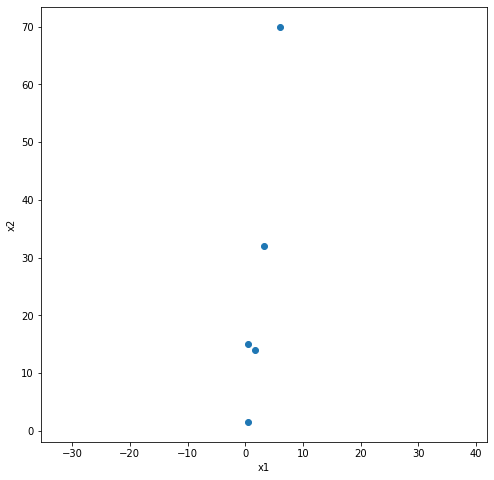

In [3]:
import numpy as np
import matplotlib.pylab as plt
D = np.array([[1.6,14],[3.2,32],[6,70],[0.5,1.5],[0.5,15]])

fig = plt.figure(figsize=(8,8))
plt.scatter(D[:,0],D[:,1])
plt.axis('equal')
plt.xlabel('x1')
plt.ylabel('x2')
plt.axis('equal')
plt.show()

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.950
Model:                            OLS   Adj. R-squared:                  0.933
Method:                 Least Squares   F-statistic:                     56.46
Date:                Mon, 27 Apr 2020   Prob (F-statistic):            0.00489
Time:                        13:34:45   Log-Likelihood:                -15.480
No. Observations:                   5   AIC:                             34.96
Df Residuals:                       3   BIC:                             34.18
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0584      4.682      0.012      0.9

/usr/local/lib/python3.6/dist-packages/statsmodels/stats/stattools.py:71: ValueWarning: omni_normtest is not valid with less than 8 observations; 5 samples were given.
  "samples were given." % int(n), ValueWarning)


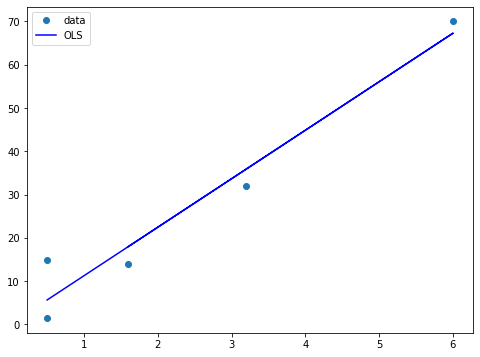

In [11]:
import statsmodels.api as sm
x = D[:,0]
y = D[:,1]

X = sm.add_constant(x) # adds a first column to add an intercept (beta_0) to our model
model = sm.OLS(y, X)
results = model.fit()
print(results.summary())
print('Parameters: ', results.params)
print('R2: ', results.rsquared)

fig, ax = plt.subplots(figsize=(8,6))
ax.plot(x, y, 'o', label="data")
ax.plot(x, results.fittedvalues, 'b-', label="OLS")
ax.legend(loc='best');

## Selección de modelos de regresión (AIC index):

Model 1 AIC:  34.959862570077306
Model 2 AIC:  34.90473781251703
Model 3 AIC:  36.703356721520336


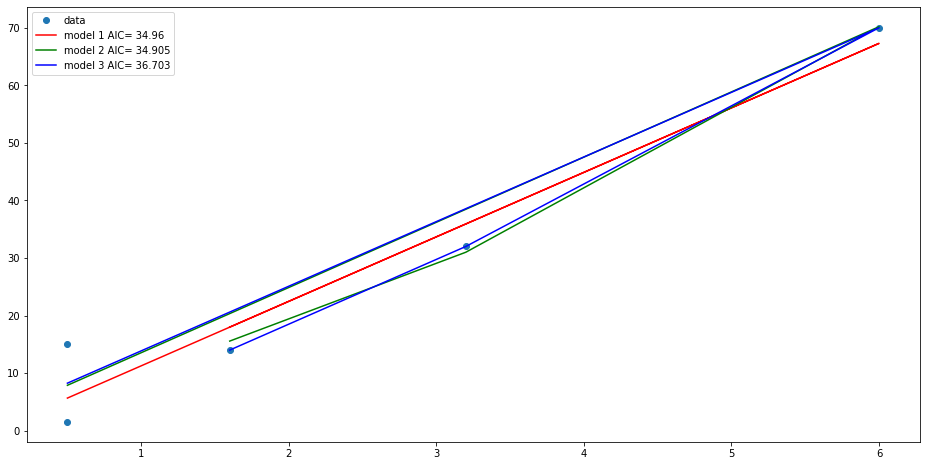

In [13]:
model1 = sm.OLS(y, X)
results1 = model1.fit()

X2 = np.column_stack((x, x**2))
X2 = sm.add_constant(X2) # adds a first column with ones
model2 = sm.OLS(y, X2)
results2 = model2.fit()

X3 = np.column_stack((x, x**2, x**3))
X3 = sm.add_constant(X3) # adds a first column with ones
model3 = sm.OLS(y, X3)
results3 = model3.fit()

print('Model 1 AIC: ',results1.aic)
print('Model 2 AIC: ',results2.aic)
print('Model 3 AIC: ',results3.aic)


fig, ax = plt.subplots(figsize=(16,8))
ax.plot(x, y, 'o', label="data")
ax.plot(x, results1.fittedvalues, 'r-', label="model 1 AIC= {:.5}".format(results1.aic))
ax.plot(x, results2.fittedvalues, 'g-', label="model 2 AIC= {:.5}".format(results2.aic))
ax.plot(x, results3.fittedvalues, 'b-', label="model 3 AIC= {:.5}".format(results3.aic))
ax.legend()
plt.show()

## Ejemplo: Regresión de variables en mcars: